---
# Exercício NLP Classificação de textos - Análise de sentimento
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**

## Avaliações de produtos das Lojas Americanas
Treinamento Supervisionado  
Processamento de linguagem natural  
Machine learning (sklearn)   
Análise de Sentimento  
Objetivo: Fazer predição se a avaliação do cliente é positiva ou negativa.   
Dados: amaricanas_cleanreviews.csv (criado por Fernando a partir do B2W-Reviews01.csv).  
Fonte: https://github.com/b2wdigital/b2w-reviews01
      
B2W-Reviews01 é um corpus aberto de análises de produtos. Ele contém mais de 130 mil avaliações de clientes de comércio eletrônico, coletadas no site da Americanas.com entre janeiro e maio de 2018. O B2W-Reviews01 oferece informações valiosas sobre o perfil do avaliador, como sexo, idade e localização geográfica. O corpus também tem duas taxas de revisão diferentes:

a taxa de escala usual de 5 pontos, representada por estrelas na maioria dos sites de comércio eletrônico,
um rótulo "recomendar a um amigo", uma pergunta "sim ou não" que representa a vontade do cliente de recomendar o produto a outra pessoa.  
   
Autor: Fernando Melo  
data: 26-07-2020

## Carregar dados e análise exploratória

In [ ]:
# Carregar bibliotecas(pandas,numpy,CountVectorizer,TfidfTransformer,SGDClassifier,GridSearchCV,Pipeline,
#                     train_test_split,)
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O FILENAME
#https://drive.google.com/file/d/1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2/view?usp=sharing

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2' -O americanas_cleanreviews.csv

--2023-05-09 13:22:00--  https://docs.google.com/uc?export=download&id=1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2
Resolving docs.google.com (docs.google.com)... 172.217.193.113, 172.217.193.138, 172.217.193.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.193.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7ob8svpo0ogg86ihr718solqsm52p61/1683638475000/00852059889916176922/*/1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2?e=download&uuid=195b9cbf-16fc-4fc5-8d2c-fb3b4675e74e [following]
--2023-05-09 13:22:06--  https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7ob8svpo0ogg86ihr718solqsm52p61/1683638475000/00852059889916176922/*/1_EKfnjomkWks4VqTMIpcEIb6nB5P0Xz2?e=download&uuid=195b9cbf-16fc-4fc5-8d2c-fb3b4675e74e
Resolving doc-0g-1o-docs.googleusercontent.com (doc-0g-1o-docs.googleusercontent.com)... 173.194.213.132, 2607:

In [ ]:
# Ler dataset
df = pd.read_csv('americanas_cleanreviews.csv')
df.columns = ['classe','texto']
print(df.shape)
df.head()

(83713, 2)


,classe,texto
0,positivo,"A entrega foi no prazo, as americanas estão de..."
1,positivo,"Excelente produto, por fora em material acríli..."
2,positivo,"produto mto bom, com essa garrafinha vc pode a..."
3,positivo,O barulho e minimo e o vento é bem forte na ve...
4,negativo,MEU PRODUTO NAO FOI ENTREGUE E A AMERICANAS ES...


positivo    47955
negativo    35758
Name: classe, dtype: int64


<Axes: >

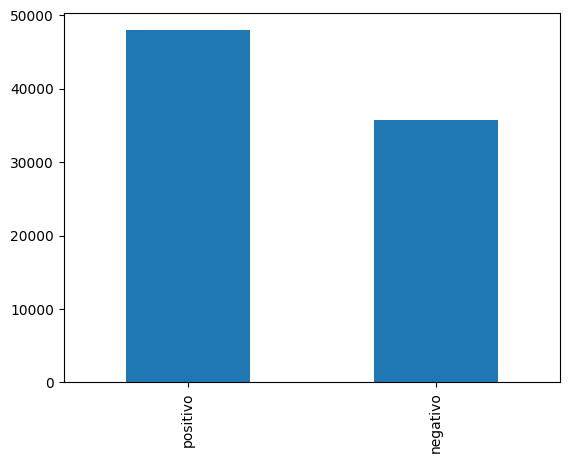

In [ ]:
# verificar distribuição da variável independente(target)
print(df.classe.value_counts())
df.classe.value_counts().plot(kind='bar')

In [ ]:
# Separação dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.texto, df.classe, test_size=0.2, 
                                                    stratify=df.classe,random_state=42)

In [ ]:
# mostrar as dimensões dos dados de treino e teste para conferir se tudo deu certo.
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (66970,) 
 positivo    0.572854
negativo    0.427146
Name: classe, dtype: float64 

TESTE  :  (16743,) 
 positivo    0.572836
negativo    0.427164
Name: classe, dtype: float64


## Extrair 'features' do corpus com TF-IDF(tokenização)


In [ ]:
# instancia o transform TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)
print('\nPeso de cada palavra do vocabulário: ')
print(tfidf_vectorizer.idf_)
# cria matriz de frequencia na representação TF-IDF
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)

Vocabulário: 
{'excelente': 17277, 'compro': 9876, 'semprep': 34992, 'este': 16791, 'site': 35512, 'entrega': 15793, 'rápida': 34332, 'parabéns': 28447, 'produto': 30959, 'não': 27367, 'bom': 7001, 'nem': 26871, 'ruim': 34288, 'apenas': 4613, 'um': 38370, 'item': 22564, 'que': 31750, 'se': 34809, 'torne': 37567, 'indispensável': 21628, 'no': 27072, 'meu': 25443, 'dia': 13532, 'muito': 26332, 'ficou': 18324, 'pouco': 30247, 'pequeno': 29064, 'pro': 30845, 'notebook': 27163, 'samsung': 34567, '15': 345, 'mas': 24937, 'foi': 18730, 'erro': 16077, 'ter': 37066, 'ligo': 23746, 'direito': 13801, 'as': 5281, 'especificações': 16444, 'mesmo': 25393, 'assim': 5397, 'material': 24995, 'estica': 16828, 'coube': 11136, 'perfeitamente': 29157, 'super': 36301, 'também': 36705, 'dentro': 12288, 'do': 14139, 'prazo': 30374, 'melhor': 25198, 'compra': 9793, 'custo': 11575, 'benefício': 6653, 'atendeu': 5562, 'minhas': 25613, 'expectativas': 17469, 'recomendo': 32572, 'imagem': 21067, 'som': 35842, 'exc

<66970x40392 sparse matrix of type '<class 'numpy.float64'>'
	with 1333680 stored elements in Compressed Sparse Row format>

## Treina o classificador

In [ ]:
# Define o pipeline incluindo o extrator de 'features do texto e um classificador
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier(loss='log')) # default: loss='hinge'. Para ter as probabilidades use loss='log' ou 'modified_huber'.
])

In [ ]:
X_train[0]

'A entrega foi no prazo, as americanas estão de parabéns. A smart tv é muito boa, a navegação na internete e pelos aplicativos e excelente, não trava, sem falar da imagem que é de surpreender. recomendo.'

In [ ]:
# Treine o modelo(fit)
classificador = pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
 # Faça a predição nos dados de teste
 predicted = classificador.predict(X_test)

In [ ]:
# avalie o modelo usando 'claasification_report' do sklearn
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negativo       0.92      0.94      0.93      7152
    positivo       0.95      0.94      0.95      9591

    accuracy                           0.94     16743
   macro avg       0.94      0.94      0.94     16743
weighted avg       0.94      0.94      0.94     16743



In [ ]:
# Verifica a probabilidade da predição
novo_texto = ['A entrega foi no prazo, as americanas estão de parabéns. A smart tv é muito boa, a navegação na internete e pelos aplicativos e excelente, não trava, sem falar da imagem que é de surpreender. recomendo.']
novo_texto = ['péssimo atendimento.']
print('Predição = ', classificador.predict(novo_texto))
print(classificador.predict_proba(novo_texto))
print('O comentário deste cliente é ', classificador.predict(novo_texto),'com ', max(classificador.predict_proba(novo_texto)[0]), '% de probabidade.')

Predição =  ['negativo']
[[0.80351251 0.19648749]]
O comentário deste cliente é  ['negativo'] com  0.80351250730802 % de probabidade.


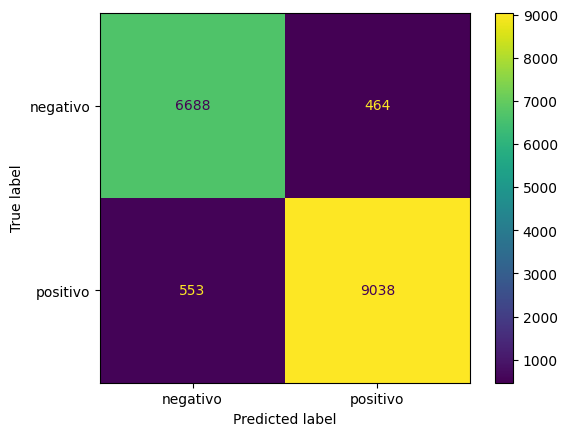

In [ ]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classificador, X_test, y_test, values_format='d')

## Salvar o modelo em disco para uso futuro

In [ ]:
# Salvando o modelo para posterior reuso
joblib.dump(classificador, 'modelo_tf-idf_sklearn_americanas.pkl')

['modelo_tf-idf_sklearn_americanas.pkl']